In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\akumar5\\Documents\\Python Bootcamp\\2021 Python for Machine Learning & Data Science Masterclass'

In [3]:
df = pd.read_csv('C:\\Users\\akumar5\\Documents\\Python Bootcamp\\2021 Python for Machine Learning & Data Science Masterclass\\DATA\\mushrooms.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
X = pd.get_dummies(df.drop('class', axis=1), drop_first=True)

In [6]:
y = df['class']

In [7]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {'n_estimators':[50,100], 'learning_rate':[0.1,0.05,0.2], 'max_depth':[3,4,5]}

In [49]:
gb_model = GradientBoostingClassifier()

In [50]:
grid = GridSearchCV(gb_model, param_grid)

In [51]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [52]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [53]:
pred = grid.predict(X_test)

In [54]:
pred

array(['p', 'e', 'p', ..., 'e', 'e', 'p'], dtype=object)

In [55]:
grid.best_estimator_

GradientBoostingClassifier(n_estimators=50)

In [56]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [57]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1274
           p       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



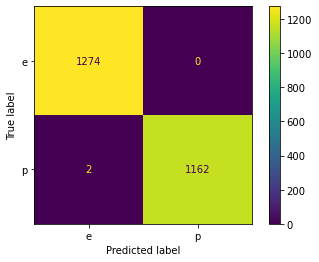

In [58]:
plot_confusion_matrix(grid, X_test, y_test)

In [31]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 1.24303162e-16, 0.00000000e+00, 0.00000000e+00,
       7.93113656e-17, 1.04524302e-03, 1.73743460e-20, 5.06011038e-06,
       0.00000000e+00, 0.00000000e+00, 4.59434058e-18, 0.00000000e+00,
       3.72796001e-17, 6.83234418e-21, 3.52182689e-22, 1.72859408e-06,
       2.31055039e-03, 5.20190505e-02, 1.84253604e-04, 1.39784757e-02,
       1.82499853e-02, 3.24844677e-03, 6.14744334e-01, 3.94907433e-03,
       0.00000000e+00, 0.00000000e+00, 2.62963075e-21, 1.25092906e-02,
       1.13588154e-02, 0.00000000e+00, 1.08408206e-16, 4.06395345e-18,
       2.80969471e-17, 0.00000000e+00, 0.00000000e+00, 4.50075390e-18,
       9.57043487e-17, 0.00000000e+00, 3.87408002e-18, 6.94945666e-18,
       1.18312069e-05, 2.95769744e-04, 1.35974873e-01, 4.69032068e-03,
       1.62912176e-02, 4.47043435e-04, 8.16239925e-04, 1.15784040e-04,
       1.83319493e-05, 2.54090956e-03, 5.34077744e-02, 1.17269394e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [32]:
feat_import = grid.best_estimator_.feature_importances_

In [33]:
imp_feat = pd.DataFrame(index=X.columns, data=feat_import, columns=['Importance'])

In [34]:
imp_feat

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,1.243032e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,7.931137e-17
...,...
habitat_l,0.000000e+00
habitat_m,2.413589e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [35]:
imp_feat = imp_feat[imp_feat['Importance']>0.0005]

In [36]:
imp_feat

,Importance
cap-surface_g,0.001045
cap-color_y,0.002311
bruises_t,0.052019
odor_f,0.013978
odor_l,0.018250
odor_m,0.003248
odor_n,0.614744
odor_p,0.003949
gill-spacing_w,0.012509
gill-size_n,0.011359


In [38]:
imp_feat = imp_feat.sort_values('Importance')

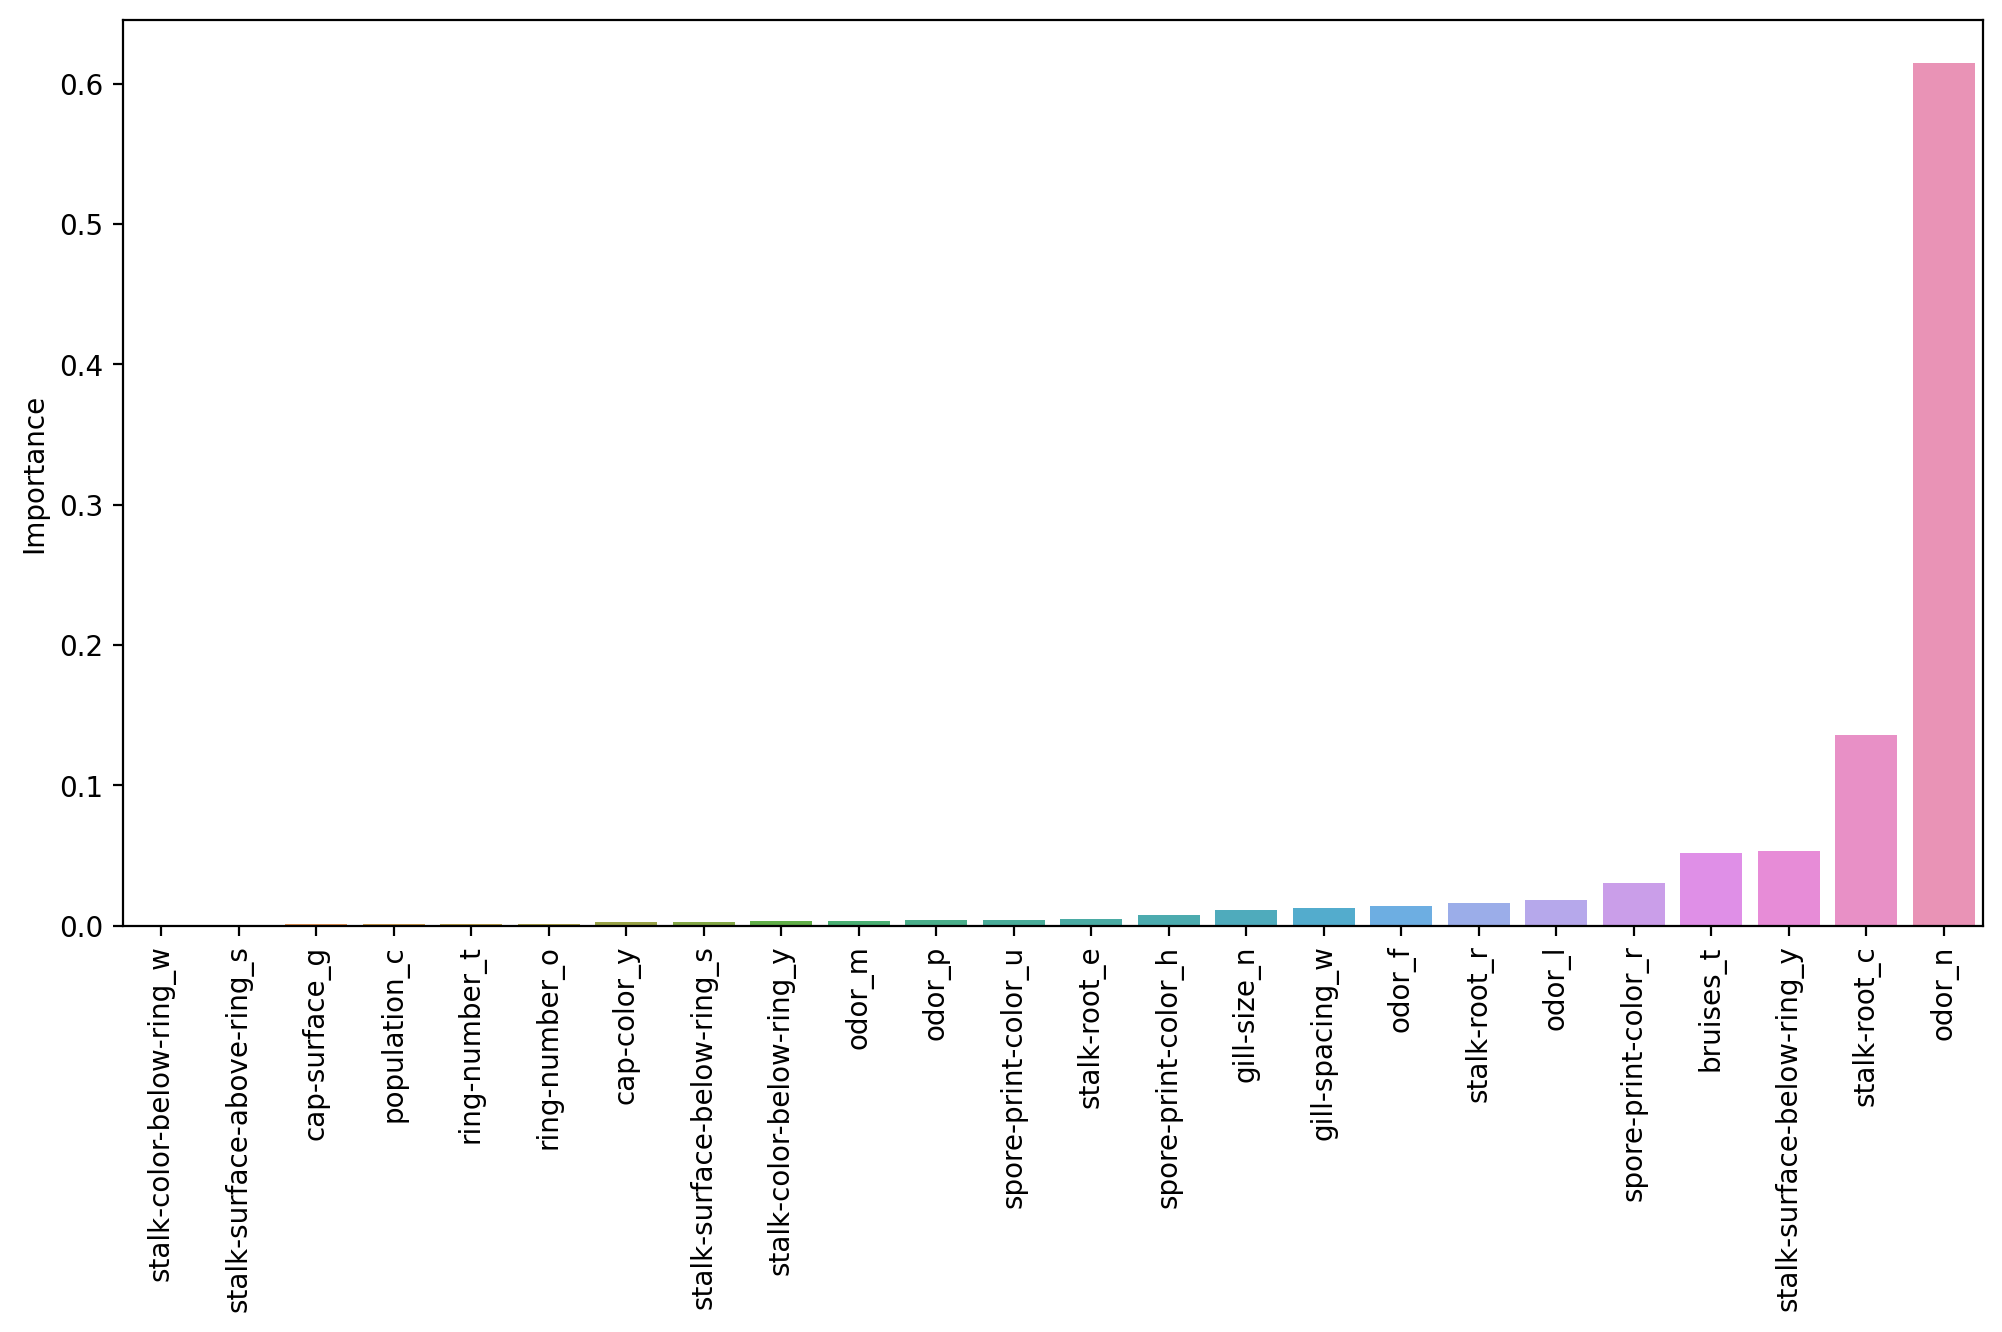

In [41]:
plt.figure(figsize=(12,6),dpi=200)

sns.barplot(data=imp_feat, x=imp_feat.index, y='Importance')

plt.xticks(rotation=90);